<a href="https://www.kaggle.com/code/shaharband/digit-recognizer?scriptVersionId=122764464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Context
**Dataset Description**

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

**Notebook Goal**

Handwritten digit classifier based on MNIST dataset using neural networks from tensorflow.

## Setup
Import Important Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # visualization library
import tensorflow as tf
import seaborn as sns

## Import Data
Reading the MNIST data set

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_submit = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [4]:
df_train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_submit.head(3)

,ImageId,Label
0,1,0
1,2,0
2,3,0


In [7]:
df_train.shape, df_test.shape, df_submit.shape

((42000, 785), (28000, 784), (28000, 2))

Checking for missing N/A values in the data set.

In [8]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

Checking the Data distribution.

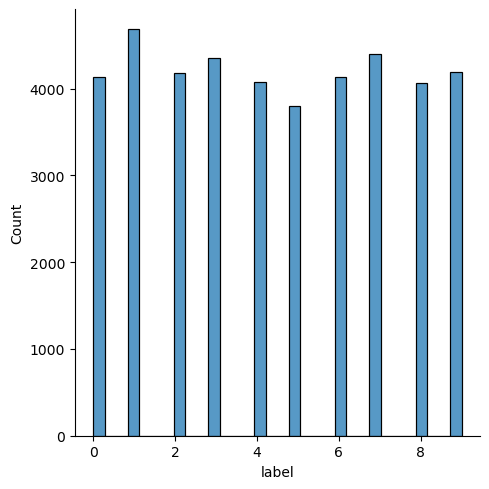

In [9]:
sns.displot(df_train['label'])

## Data Labeling: Creating X and y variables
based on the dataset description.

In [10]:
y = df_train.iloc[:,0]
X = df_train.iloc[:,1:]
X_test = df_test

## Data Normalization

In [11]:
X = X / 255
X_test = X_test / 255

In [12]:
X.shape, X_test.shape

((42000, 784), (28000, 784))

## Data Shaping

In [13]:
reshaped_X = X.values.reshape(X.shape[0], 28, 28)
X = reshaped_X

reshaped_test = X_test.values.reshape(X_test.shape[0], 28, 28)
X_test = reshaped_test

X.shape, X_test.shape

((42000, 28, 28), (28000, 28, 28))

## Data Visualization

7260


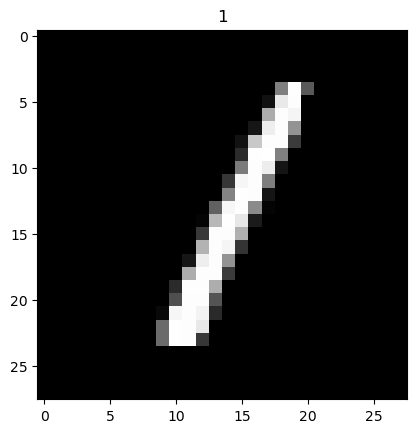

In [14]:
image_id = np.random.randint(-1,len(X))
print(image_id)

image_mat = X[image_id, :, :]
plt.title(y[image_id])
plt.imshow(image_mat, 'gray')

## Data Splitting: Creating Train and Dev Sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((37800, 28, 28), (4200, 28, 28), (37800,), (4200,), (28000, 28, 28))

## Defining the Model (CNN)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [17]:
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation = "linear")      
    ]
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Training the Model

In [18]:
history = model.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=15, 
    validation_data=(X_val, y_val))

Epoch 1/15
296/296 [==============================] - 20s 63ms/step - loss: 0.1985 - accuracy: 0.9367 - val_loss: 0.1192 - val_accuracy: 0.9655
Epoch 2/15
296/296 [==============================] - 18s 60ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 3/15
296/296 [==============================] - 18s 59ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0532 - val_accuracy: 0.9845
Epoch 4/15
296/296 [==============================] - 17s 58ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 5/15
296/296 [==============================] - 17s 59ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 6/15
296/296 [==============================] - 17s 58ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0787 - val_accuracy: 0.9814
Epoch 7/15
296/296 [==============================] - 18s 59ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0747 - val_accuracy:

## Evaulating the Performance

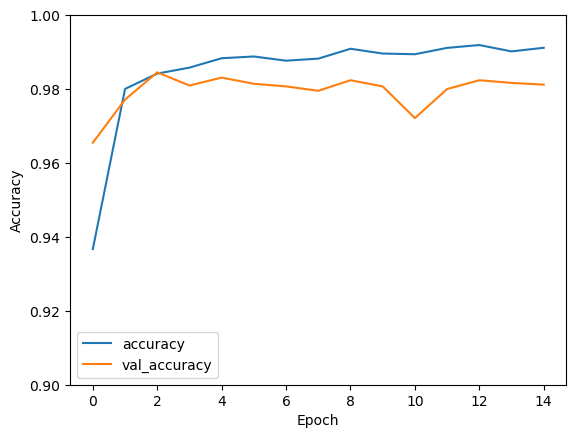

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend()

In [20]:
val_loss, val_acc = model.evaluate(X_val,  y_val)

132/132 [==============================] - 1s 6ms/step - loss: 0.1447 - accuracy: 0.9812


In [21]:
y_pred = np.argmax(model.predict(X_val),axis=1)

132/132 [==============================] - 1s 6ms/step


In [22]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
5457,8,8
38509,1,1
25536,9,9
31803,9,9
39863,8,8
...,...,...
16041,4,4
4867,2,2
28123,7,7
3780,7,7


In [23]:
predictions = np.argmax(model.predict(X_test), axis=1)

875/875 [==============================] - 5s 6ms/step


In [24]:
submission = pd.DataFrame({'ImageId': df_submit['ImageId'], 'Label':predictions})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [25]:
submission.to_csv('submission.csv', index=False)
submission = pd.read_csv("submission.csv")
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
